In [87]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import FactorAnalysis
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [88]:
# read the data
train=pd.read_csv(r"E:\data science\analytics vidya\practice dataset\big mart sales prediction\train_v9rqX0R.csv")
test=pd.read_csv(r"E:\data science\analytics vidya\practice dataset\big mart sales prediction\test_AbJTz2l.csv")

In [89]:
#Exploratory Data Analysis
#shape:
train.shape,test.shape
test2 = test.copy()

In [90]:
train['source'] = 'train'
test['source'] = 'test'
test["Item_Outlet_Sales"]=0
data=pd.concat([train,test])

In [91]:
train.shape,test.shape,data.shape

((8523, 13), (5681, 13), (14204, 13))

<AxesSubplot:ylabel='Frequency'>

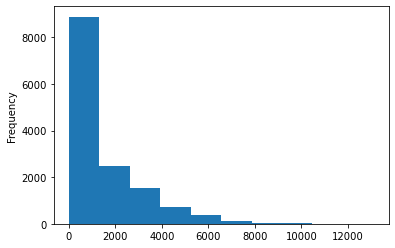

In [92]:
data["Item_Outlet_Sales"].plot(kind="hist")

In [93]:
from scipy.stats import kurtosis
from scipy.stats import skew
print(kurtosis(data["Item_Outlet_Sales"], axis=0, bias=True))
print(skew(data["Item_Outlet_Sales"], axis=0, bias=True))

2.4181654482479065
1.5445207410133672


In [94]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [95]:
#categorical columns
cat=data.select_dtypes(include=["object"]).columns
num=data.select_dtypes(include=["int","float"]).columns

In [96]:
data.columns
for x in data.columns:
    print(x,data[x].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 13006
Item_Type 16
Item_MRP 8052
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3494
source 2


In [97]:
for x in cat:
    print(x,data[x].nunique(),data[x].unique())

Item_Identifier 1559 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size 3 ['Medium' nan 'High' 'Small']
Outlet_Location_Type 3 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
source 2 ['train' 'test']


In [98]:
print(round(data[["Item_Weight","Outlet_Size"]].isnull().sum()/len(data.index),2))

Item_Weight    0.17
Outlet_Size    0.28
dtype: float64


In [99]:
data["Item_Weight"]=data["Item_Weight"].fillna(value=data["Item_Weight"].mean())
data["Outlet_Size"].replace(np.nan,data["Outlet_Size"].mode()[0],inplace=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

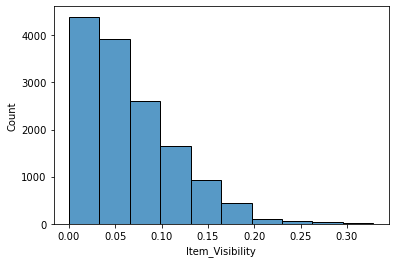

In [100]:
sns.histplot(data["Item_Visibility"],bins=10)

In [101]:
data[data["Item_Visibility"]==0]["Item_Visibility"].count()

879

In [102]:
data["Item_Visibility"].replace(0,data["Item_Visibility"].mean(),inplace=True)

In [103]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x:x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food","DR":"Drinks","NC":"Non-Consumables"})
data["Item_Type_Combined"].value_counts()

Food               10201
Non-Consumables     2686
Drinks              1317
Name: Item_Type_Combined, dtype: int64

In [104]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

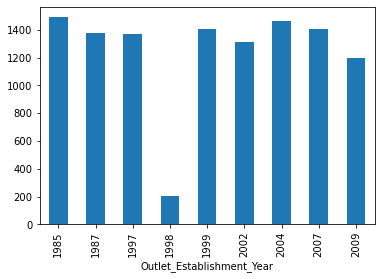

In [105]:
data.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean().plot(kind="bar")

In [106]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()


count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

<AxesSubplot:xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

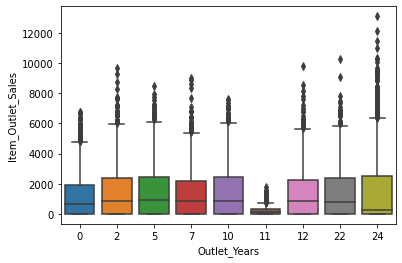

In [107]:
sns.boxplot(x="Outlet_Years",y="Item_Outlet_Sales",data=data)

<AxesSubplot:>

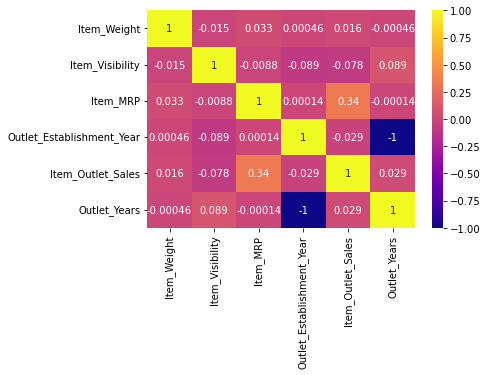

In [108]:
sns.heatmap(data.corr(),annot=True,cmap="plasma",vmin=-1,vmax=1)


In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = le.fit_transform(data['Outlet_Type'])
data['Item_Type_Combined'] = le.fit_transform(data['Item_Type_Combined'])

In [110]:
data['Outlet'].value_counts()
data['Item_Fat_Content'].value_counts()
data['Outlet_Location_Type'].value_counts()
data['Item_Type_Combined'].value_counts()

1    10201
2     2686
0     1317
Name: Item_Type_Combined, dtype: int64

In [111]:
data.drop(["Outlet_Identifier","Item_Identifier","Outlet_Establishment_Year"],axis=1,inplace=True)

In [112]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Type_Combined","Outlet"])


In [113]:
data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,4,249.8092,3735.1380,train,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,14,48.2692,443.4228,train,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,train,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.065953,6,182.0950,732.3800,train,11,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.065953,9,53.8614,994.7052,train,22,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [114]:
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

In [115]:
test.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)

In [116]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [117]:
test.shape,train.shape

((5681, 30), (8523, 31))

In [118]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()

cols = train.columns[train.columns != 'Item_Outlet_Sales']
train[cols] = scalar.fit_transform(train[cols])

cols = test.columns
test[cols]=scalar.fit_transform(test[cols])


In [119]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, random_state=42)

train.shape, valid.shape


((6392, 31), (2131, 31))

In [120]:
features = [c for c in train.columns if c not in ['Item_Identifier', 'Item_Outlet_Sales']]
features


['Item_Weight',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Years',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Item_Type_Combined_0',
 'Item_Type_Combined_1',
 'Item_Type_Combined_2',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']

In [121]:
#MODEL 1 - Random Forest Regressor
from sklearn import metrics
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
rf_padrao = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)


#Model fit(train x and train y )
rf_padrao.fit(train[features], train['Item_Outlet_Sales'])

#valid predict
preds_rf = rf_padrao.predict(valid[features])

#Rmse calculation:
rmse_rf = sqrt(metrics.mean_squared_error(valid['Item_Outlet_Sales'], preds_rf))
print(rmse_rf)

#Test predict
preds_rf = rf_padrao.predict(test[features])

#Exporta CSV para submissão
df_rf = test2[['Item_Identifier','Outlet_Identifier']].copy()
df_rf['Item_Outlet_Sales'] = preds_rf


1097.0856040160327


In [122]:
#MODEL 2- SVM regression

from sklearn.svm import SVR
svm_padrao=SVR(C=1.0, epsilon=0.2, kernel='rbf')


#Model fit(train x and train y )
svm_padrao.fit(train[features], train['Item_Outlet_Sales'])

#valid predict
preds_svm = svm_padrao.predict(valid[features])

#Rmse calculation:
rmse_svm = sqrt(metrics.mean_squared_error(valid['Item_Outlet_Sales'], preds_svm))
print(rmse_svm)

#Test predict
preds_svm = svm_padrao.predict(test[features])

#Exporta CSV para submissão
df_svm = test2[['Item_Identifier','Outlet_Identifier']].copy()
df_svm['Item_Outlet_Sales'] = preds_svm


1633.9754080345265


In [123]:
#MODEL 3- XGBRegressor

from xgboost import XGBRegressor

XGBR_padrao = XGBRegressor(n_estimators=200, learning_rate=0.01, random_state=42, use_label_encoder=True)


#Model fit(train x and train y )
XGBR_padrao.fit(train[features], train['Item_Outlet_Sales'])

#valid predict
preds_XGBR = XGBR_padrao.predict(valid[features])

#Rmse calculation:
rmse_XGBR = sqrt(metrics.mean_squared_error(valid['Item_Outlet_Sales'], preds_XGBR))
print(rmse_XGBR)

#Test predict
preds_XGBR =XGBR_padrao.predict(test[features])

#Exporta CSV para submissão
df_XGBR = test2[['Item_Identifier','Outlet_Identifier']].copy()
df_XGBR['Item_Outlet_Sales'] = preds_XGBR

1092.4569791649928


In [124]:
df_XGBR[df_XGBR["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [125]:
#MODEL 4- AdaBoost

from sklearn.ensemble import AdaBoostRegressor

# Executando o modelo
ada_padrao = AdaBoostRegressor(n_estimators=200, random_state=42)


#Model fit(train x and train y )
ada_padrao.fit(train[features], train['Item_Outlet_Sales'])

#valid predict
preds_ada = ada_padrao.predict(valid[features])

#Rmse calculation:
rmse_ada = sqrt(metrics.mean_squared_error(valid['Item_Outlet_Sales'], preds_ada))
print(rmse_ada)

#Test predict
preds_ada =ada_padrao.predict(test[features])

#Exporta CSV para submissão
df_ada = test2[['Item_Identifier','Outlet_Identifier']].copy()
df_ada['Item_Outlet_Sales'] = preds_ada

1257.1876917889524


In [138]:

data = pd.DataFrame({"rmse_ada":np.round(rmse_ada),
                    "rmse_XGBR":np.round(rmse_XGBR),
                    "rmse_svm":np.round(rmse_svm),
                    "rmse_rf":np.round(rmse_rf)},index=["RMSE"])

data

,rmse_ada,rmse_XGBR,rmse_svm,rmse_rf
RMSE,1257.0,1092.0,1634.0,1097.085604


In [147]:

from sklearn.ensemble import VotingRegressor

#list of regressors
estimators = [('rf', rf_padrao),('svm',svm_padrao),('xgbr', XGBR_padrao),('ada',ada_padrao)]

# averages the individual predictions to form a final prediction.
ensemble1 = VotingRegressor(estimators=estimators, n_jobs=-1)

#Model fit(train x and train y )
ensemble1.fit(train[features], train['Item_Outlet_Sales'])

#valid predict
preds_ens = ensemble1.predict(valid[features])

#Rmse calculation:
rmse_ens = sqrt(metrics.mean_squared_error(valid['Item_Outlet_Sales'], preds_ens))
print(rmse_ens)

#Test predict
preds_ens = ensemble1.predict(test[features])

#Exporta CSV para submiss
df_ens = test2[['Item_Identifier','Outlet_Identifier']].copy()
df_ens['Item_Outlet_Sales'] = preds_ens

1122.0853612600497


In [149]:
df_ens["Item_Outlet_Sales"]=df_ens["Item_Outlet_Sales"].round()

In [150]:
df_ens

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1656.0
1,FDW14,OUT017,1572.0
2,NCN55,OUT010,1219.0
3,FDQ58,OUT017,2381.0
4,FDY38,OUT027,4895.0
...,...,...,...
5676,FDB58,OUT046,2081.0
5677,FDD47,OUT018,2543.0
5678,NCO17,OUT045,1909.0
5679,FDJ26,OUT017,3208.0


In [151]:
df_ens.to_csv('submission2_Big_mart.csv',index=False)